## Gera√ß√£o de dados para distribui√ß√£o Weibull

A **Distribui√ß√£o de Weibull** √© uma distribui√ß√£o estat√≠stica usada para modelar o tempo de vida de sistemas e processos, sendo muito utilizada em confiabilidade, an√°lise de falhas e previs√£o de tempos at√© eventos (como tempo at√© a falha de um equipamento ou dura√ß√£o de um fen√¥meno natural).  

#### **Par√¢metros da Distribui√ß√£o de Weibull**  
Ela √© definida por dois principais par√¢metros:  

1. **Par√¢metro de forma ($\beta$)** ‚Äì Controla a "forma" da distribui√ß√£o e indica o comportamento da taxa de falha:  
   - Se $\beta < 1$: a taxa de falha **diminui** com o tempo (exemplo: eletr√¥nicos que sofrem mortalidade infantil).  
   - Se $\beta = 1$: a taxa de falha √© **constante**, tornando a Weibull equivalente a uma distribui√ß√£o exponencial (exemplo: componentes eletr√¥nicos est√°veis).  
   - Se $\beta > 1$: a taxa de falha **aumenta** com o tempo, indicando desgaste (exemplo: pe√ßas mec√¢nicas que sofrem degrada√ß√£o).  

2. **Par√¢metro de escala ($\eta$)** ‚Äì Representa um valor de refer√™ncia para o tempo m√©dio de vida. Quando o tempo $t = \eta$, 63,2% das unidades j√° falharam.  

A fun√ß√£o densidade de probabilidade (PDF) da Weibull √©:  

$
f(t) = \frac{\beta}{\eta} \left(\frac{t}{\eta}\right)^{\beta - 1} e^{-\left(\frac{t}{\eta}\right)^\beta}
$

Estat√≠stica KS: 0.011328643332788157, p-valor: 0.5386194707086644


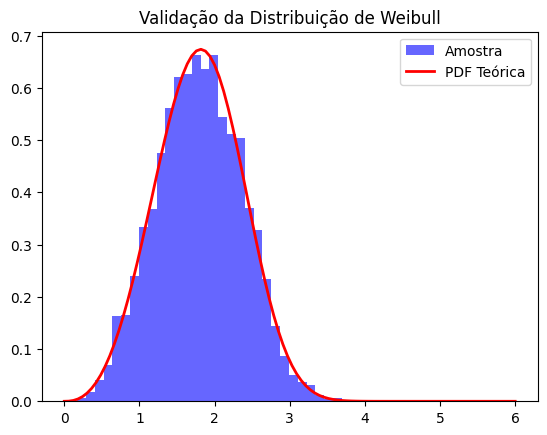

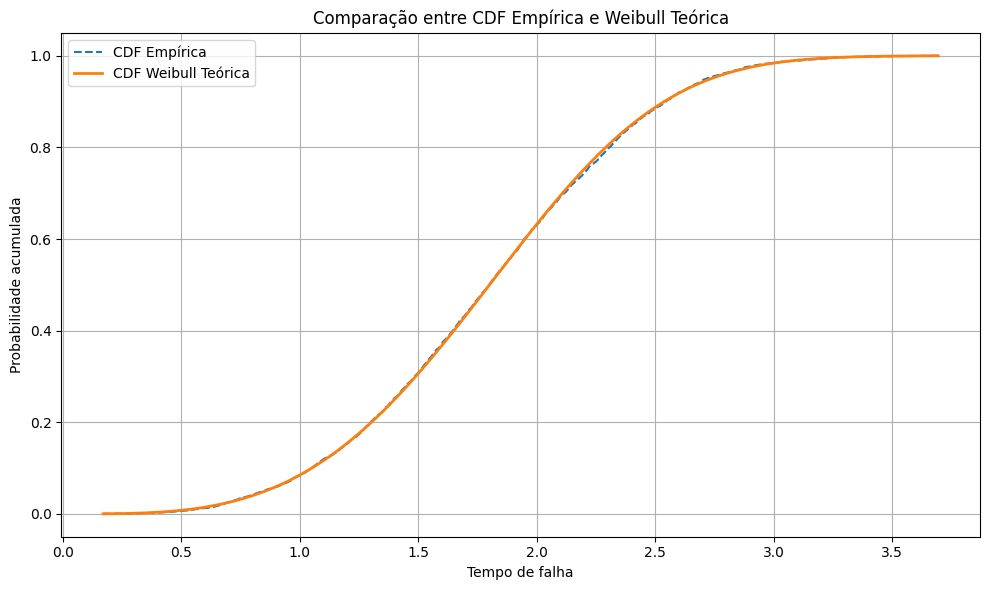

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, kstest

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, kstest

# Par√¢metro
k = 3.5
lambda_ = 2500

# Gerar dados
dados = weibull_min.rvs(k, scale=lambda_, size=5_000)
np.savetxt(f"dados_brutos_brocas.csv", dados, delimiter=",")

# Teste de ader√™ncia - Kolmogorov-Smirnov
D, p_value = kstest(dados, 'weibull_min', args=(k, 0, lambda_))
print(f"Estat√≠stica KS: {D}, p-valor: {p_value}")

# Se o p-valor for maior que 0.05, podemos aceitar que os dados seguem a distribui√ß√£o de Weibull

# Visualiza√ß√£o do histograma e PDF te√≥rica
x = np.linspace(0, 6, 100)
plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', label="Amostra")
plt.plot(x, weibull_min.pdf(x, k, scale=lambda_), 'r-', lw=2, label="PDF Te√≥rica")
plt.legend()
plt.title("Valida√ß√£o da Distribui√ß√£o de Weibull")
plt.show()

# Plot da CDF emp√≠rica vs te√≥rica
dados_ordenados = np.sort(dados)
cdf_empirica = np.arange(1, len(dados)+1) / len(dados)
cdf_teorica = weibull_min.cdf(dados_ordenados, c=k, scale=lambda_)

plt.figure(figsize=(10, 6))
plt.plot(dados_ordenados, cdf_empirica, label='CDF Emp√≠rica', linestyle='--')
plt.plot(dados_ordenados, cdf_teorica, label='CDF Weibull Te√≥rica', linewidth=2)
plt.title('Compara√ß√£o entre CDF Emp√≠rica e Weibull Te√≥rica')
plt.xlabel('Tempo de falha')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### **Comparar diferentes valores de k**

mantendo um valor lambda fixo

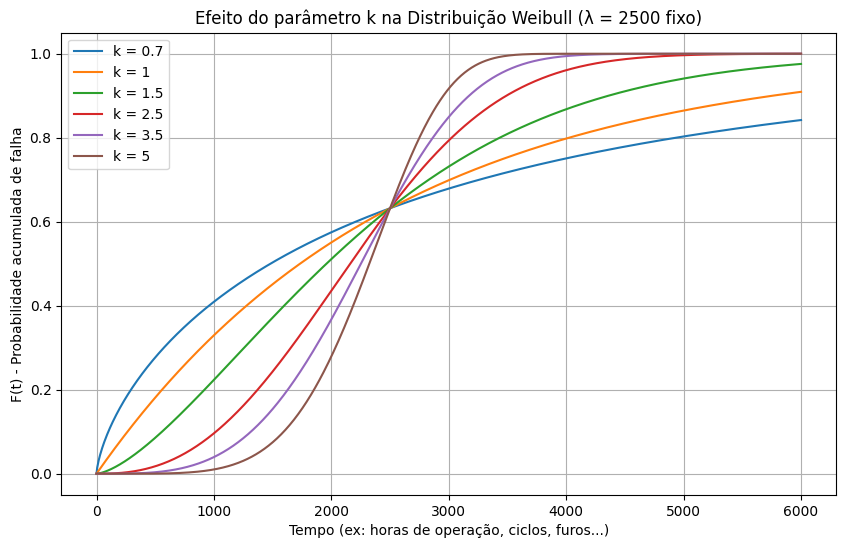

In [27]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Par√¢metros
lambd = 2500  # Escala fixa
ks = [0.7, 1, 1.5, 2.5, 3.5, 5]  # Diferentes formas (k)

# Intervalo de tempo para o gr√°fico
t = np.linspace(0, 6000, 1000)

# Plotando as curvas CDF
plt.figure(figsize=(10, 6))
for k in ks:
    cdf = weibull_min.cdf(t, c=k, scale=lambd)
    plt.plot(t, cdf, label=f"k = {k}")

plt.title("Efeito do par√¢metro k na Distribui√ß√£o Weibull (Œª = 2500 fixo)")
plt.xlabel("Tempo (ex: horas de opera√ß√£o, ciclos, furos...)")
plt.ylabel("F(t) - Probabilidade acumulada de falha")
plt.legend()
plt.grid(True)
plt.show()

### Explica√ß√£o quando gr√°fico parece distribui√ß√£o normal

Quando o gr√°fico da **PDF da distribui√ß√£o Weibull** com $k = 3.5$ e $\lambda = 2500$ **parece com uma distribui√ß√£o normal**, isso n√£o √© coincid√™ncia ‚Äî h√° uma explica√ß√£o estat√≠stica e pr√°tica s√≥lida por tr√°s disso.

---

#### Interpreta√ß√£o da PDF com formato de sino (normal)

A **distribui√ß√£o Weibull** √© extremamente **flex√≠vel**. Dependendo do valor de $k$, ela pode:

- Se parecer com a **exponencial** ($k = 1$);
- Ter cauda longa e assimetria √† direita ($k < 2$);
- Ou, como no seu caso, **parecer sim√©trica como uma normal**.

---

#### Por que a Weibull parece uma normal quando $k = 3.5$?

- Quando $k > 3$, a **fun√ß√£o densidade de probabilidade (PDF)** da Weibull **tende a se aproximar de uma curva sim√©trica**.
- A distribui√ß√£o **se concentra em torno de $\lambda$**, com pouca assimetria.
- O pico ocorre **perto de $\lambda \cdot \left( \frac{k-1}{k} \right)^{1/k}$** ‚Äî isso √© pr√≥ximo de $\lambda$ quando $k$ √© alto.

No caso de:

- $k = 3.5$
- $\lambda = 2500$

A curva tem um **pico bem definido** e **queda sim√©trica**, muito parecida com uma **curva normal centrada pr√≥ximo de 2250-2500**.

---

## üìä O que isso significa no mundo real?

- A maioria das brocas (ou pe√ßas) **tende a falhar em torno de um tempo m√©dio bem definido**.
- O risco de falha **aumenta rapidamente at√© um pico e depois decresce**, indicando que:
  - Poucas pe√ßas falham muito cedo;
  - Muitas falham num intervalo central;
  - Poucas resistem por muito mais tempo.

Esse √© o **comportamento esperado de equipamentos industriais de qualidade**, onde **o desgaste √© previs√≠vel e acumulativo**.

---

### Resumo

| Valor de $k$ | Forma da PDF | Interpreta√ß√£o |
|------------------|--------------|----------------|
| $< 1$        | Decrescente  | Falhas precoces |
| $\approx 1$  | Exponencial  | Falhas aleat√≥rias |
| $1 < k < 3$  | Assim√©trica √† direita | Desgaste leve |
| $\geq 3$     | Forma de sino (quase normal) | Desgaste concentrado |

---


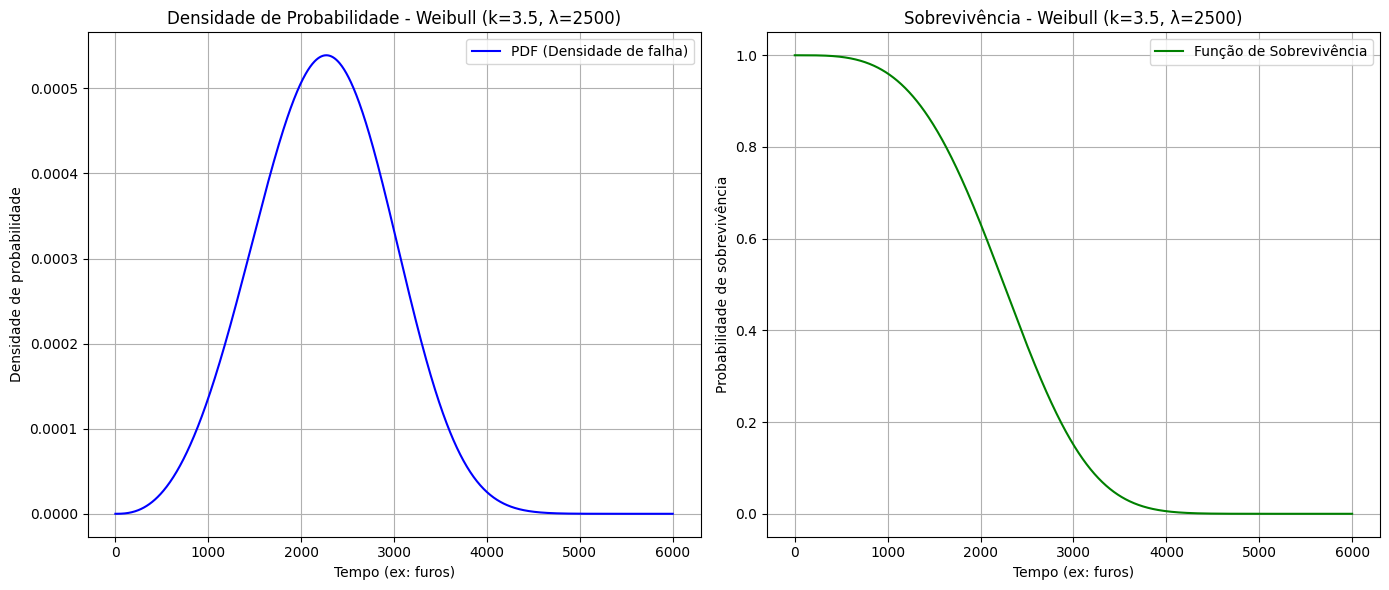

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Par√¢metros da distribui√ß√£o Weibull
k = 3.5
lambda_ = 2500

# Intervalo de tempo para visualiza√ß√£o
t = np.linspace(0, 6000, 1000)

# PDF - Fun√ß√£o de Densidade de Probabilidade
pdf = weibull_min.pdf(t, c=k, scale=lambda_)

# Fun√ß√£o de Sobreviv√™ncia (1 - CDF)
survival = weibull_min.sf(t, c=k, scale=lambda_)

# Plotando
plt.figure(figsize=(14, 6))

# PDF
plt.subplot(1, 2, 1)
plt.plot(t, pdf, label="PDF (Densidade de falha)", color='blue')
plt.title("Densidade de Probabilidade - Weibull (k=3.5, Œª=2500)")
plt.xlabel("Tempo (ex: furos)")
plt.ylabel("Densidade de probabilidade")
plt.grid(True)
plt.legend()

# Sobreviv√™ncia
plt.subplot(1, 2, 2)
plt.plot(t, survival, label="Fun√ß√£o de Sobreviv√™ncia", color='green')
plt.title("Sobreviv√™ncia - Weibull (k=3.5, Œª=2500)")
plt.xlabel("Tempo (ex: furos)")
plt.ylabel("Probabilidade de sobreviv√™ncia")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### Sobrepondo a curva distribui√ß√£o normal com densidade weibull

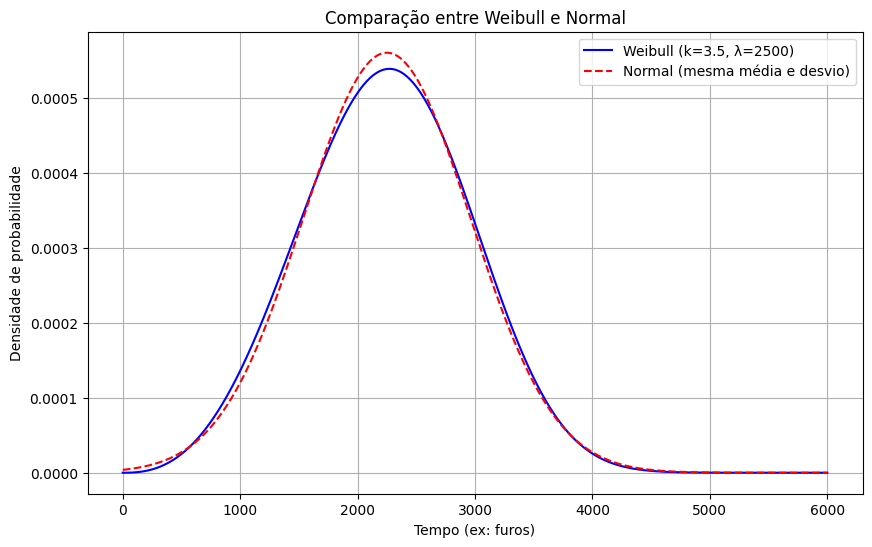

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, norm

# Par√¢metros da Weibull
k = 3.5
lambda_ = 2500

# Intervalo de tempo
t = np.linspace(0, 6000, 1000)

# PDF da Weibull
pdf_weibull = weibull_min.pdf(t, c=k, scale=lambda_)

# M√©dia e desvio padr√£o da Weibull
mean_weibull = weibull_min.mean(c=k, scale=lambda_)
std_weibull = weibull_min.std(c=k, scale=lambda_)

# PDF da distribui√ß√£o Normal com mesma m√©dia e desvio padr√£o
pdf_normal = norm.pdf(t, loc=mean_weibull, scale=std_weibull)

# Plotando as duas curvas
plt.figure(figsize=(10, 6))
plt.plot(t, pdf_weibull, label="Weibull (k=3.5, Œª=2500)", color='blue')
plt.plot(t, pdf_normal, label="Normal (mesma m√©dia e desvio)", color='red', linestyle='--')
plt.title("Compara√ß√£o entre Weibull e Normal")
plt.xlabel("Tempo (ex: furos)")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid(True)
plt.show()


### **Comparar diferentes valores de Œª (lambda)** mantendo o **k fixo (por exemplo, 3.5)**, de modo que voc√™ possa visualizar **como o tempo de falha t√≠pico se desloca** com o aumento ou diminui√ß√£o da escala:

---

## üìä O que esse gr√°fico mostrar√°:

- Todas as curvas ter√£o **o mesmo formato** (porque \( k \) √© fixo).
- Mas as curvas com Œª menor (ex: 500) v√£o ‚Äúsubir‚Äù mais cedo ‚Üí indicando **falhas precoces**.
- J√° as com Œª maior (ex: 5000) v√£o crescer mais lentamente ‚Üí indicando **vida √∫til mais longa**.

---


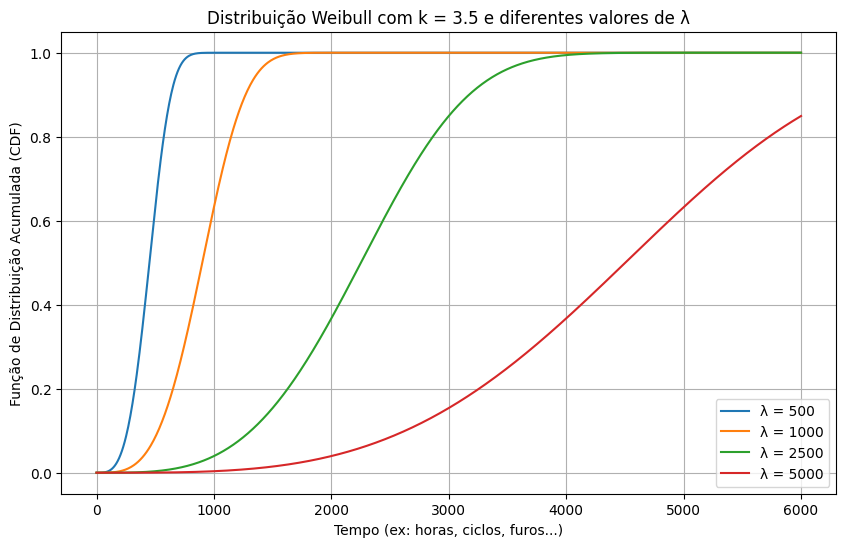

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Par√¢metro de forma fixo
k = 3.5

# Diferentes valores de lambda (escala)
lambdas = [500, 1000, 2500, 5000]

# Intervalo de tempo para plotar a CDF
t = np.linspace(0, 6000, 1000)

# Plotando curvas de CDF da Weibull para diferentes lambdas
plt.figure(figsize=(10, 6))
for lambda_ in lambdas:
    cdf = weibull_min.cdf(t, c=k, scale=lambda_)
    plt.plot(t, cdf, label=f"Œª = {lambda_}")

plt.title("Distribui√ß√£o Weibull com k = 3.5 e diferentes valores de Œª")
plt.xlabel("Tempo (ex: horas, ciclos, furos...)")
plt.ylabel("Fun√ß√£o de Distribui√ß√£o Acumulada (CDF)")
plt.legend()
plt.grid(True)
plt.show()


### Realiza a compara√ß√£o com KS

1. **Gera dados simulados** com distribui√ß√£o Weibull para diferentes valores de Œª (mantendo $k = 3.5$);
2. **Plota as curvas CDF te√≥ricas**;
3. **Aplica o teste de Kolmogorov-Smirnov** para verificar se os dados simulados se ajustam √† distribui√ß√£o Weibull te√≥rica.

---

### ‚úÖ O que o c√≥digo faz:

- Gera dados simulando o **tempo de vida** de componentes com diferentes escalas Œª.
- Plota as **curvas de falha acumulada (CDF)** para cada valor.
- Aplica o **teste KS (Kolmogorov-Smirnov)** que verifica:
  - Se os dados simulados v√™m da mesma distribui√ß√£o Weibull com os par√¢metros fornecidos.
  - **p-valor alto (> 0.05)** ‚Üí os dados **seguem bem a distribui√ß√£o**.
  - **p-valor baixo (‚â§ 0.05)** ‚Üí h√° **evid√™ncia contra o ajuste** √† distribui√ß√£o.

---

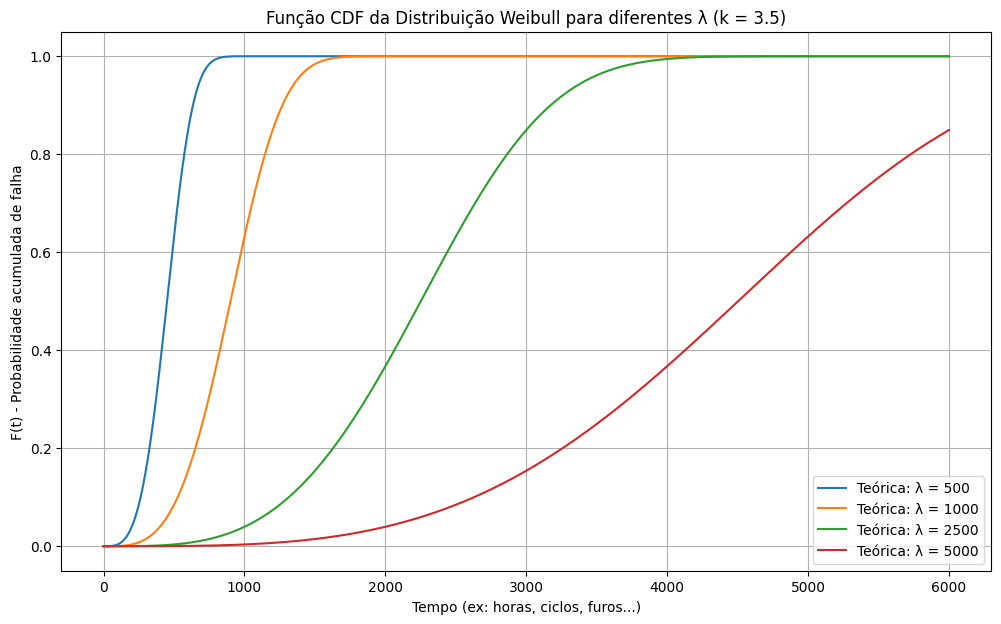

Resultados do Teste KS para dados simulados:
Œª = 500 | Estat√≠stica KS = 0.0300 | p-valor = 0.3244
Œª = 1000 | Estat√≠stica KS = 0.0300 | p-valor = 0.3244
Œª = 2500 | Estat√≠stica KS = 0.0300 | p-valor = 0.3244
Œª = 5000 | Estat√≠stica KS = 0.0300 | p-valor = 0.3244


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, kstest

# Par√¢metro de forma fixo
k = 3.5

# Diferentes valores de escala (lambda)
lambdas = [500, 1000, 2500, 5000]

# Intervalo de tempo para visualiza√ß√£o
t = np.linspace(0, 6000, 1000)

# Plotagem das CDFs te√≥ricas
plt.figure(figsize=(12, 7))
for lambda_ in lambdas:
    cdf = weibull_min.cdf(t, c=k, scale=lambda_)
    plt.plot(t, cdf, label=f"Te√≥rica: Œª = {lambda_}")

plt.title("Fun√ß√£o CDF da Distribui√ß√£o Weibull para diferentes Œª (k = 3.5)")
plt.xlabel("Tempo (ex: horas, ciclos, furos...)")
plt.ylabel("F(t) - Probabilidade acumulada de falha")
plt.legend()
plt.grid(True)
plt.show()

# Gera√ß√£o e verifica√ß√£o de dados simulados
print("Resultados do Teste KS para dados simulados:")
for lambda_ in lambdas:
    # Gera 1000 dados simulados com a distribui√ß√£o Weibull
    dados_simulados = weibull_min.rvs(c=k, scale=lambda_, size=1000, random_state=42)

    # Testa se os dados seguem uma distribui√ß√£o Weibull com os mesmos par√¢metros
    estatistica, p_valor = kstest(dados_simulados, 'weibull_min', args=(k, 0, lambda_))

    print(f"Œª = {lambda_} | Estat√≠stica KS = {estatistica:.4f} | p-valor = {p_valor:.4f}")

## Gera esse teste de KS e os gr√°ficos de compara√ß√£o entre CDF emp√≠rica e te√≥rica

Estat√≠stica KS: 0.029956251442476683, p-valor: 0.3243752124357733


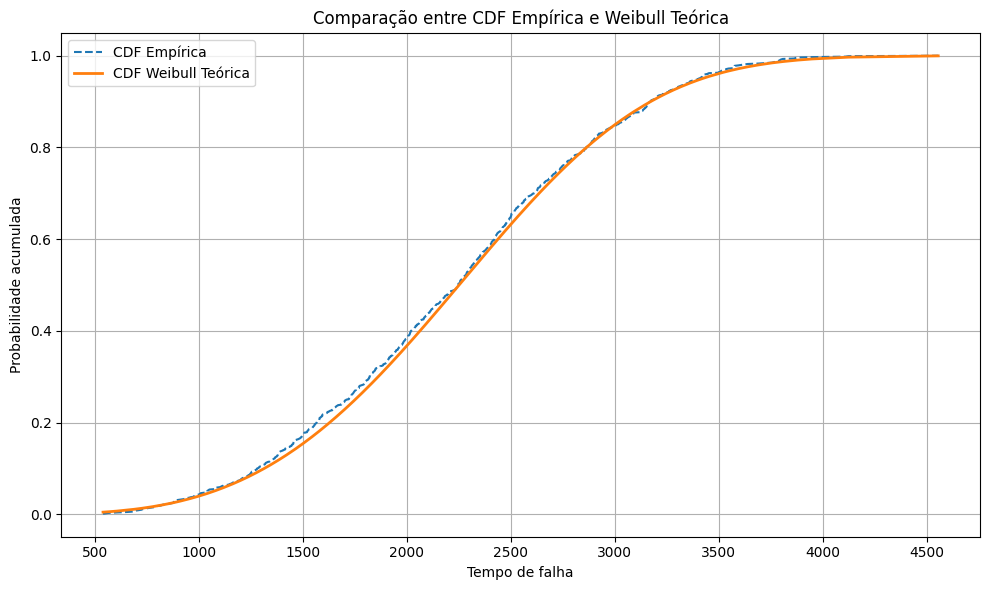

In [19]:
import numpy as np
from scipy.stats import weibull_min, kstest
import matplotlib.pyplot as plt

# Par√¢metros da distribui√ß√£o Weibull
k = 3.5  # par√¢metro de forma
lambda_ = 2500  # par√¢metro de escala

# Gerando dados simulados
np.random.seed(42)
dados = weibull_min.rvs(c=k, scale=lambda_, size=1000)

# Teste KS
estatistica, p_valor = kstest(dados, 'weibull_min', args=(k, 0, lambda_))

print(f'Estat√≠stica KS: {estatistica}, p-valor: {p_valor}')

# Plot da CDF emp√≠rica vs te√≥rica
dados_ordenados = np.sort(dados)
cdf_empirica = np.arange(1, len(dados)+1) / len(dados)
cdf_teorica = weibull_min.cdf(dados_ordenados, c=k, scale=lambda_)

plt.figure(figsize=(10, 6))
plt.plot(dados_ordenados, cdf_empirica, label='CDF Emp√≠rica', linestyle='--')
plt.plot(dados_ordenados, cdf_teorica, label='CDF Weibull Te√≥rica', linewidth=2)
plt.title('Compara√ß√£o entre CDF Emp√≠rica e Weibull Te√≥rica')
plt.xlabel('Tempo de falha')
plt.ylabel('Probabilidade acumulada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
def cria_data_set(k: float, lambda_: float, size: int = 100, save_img: bool = False, nome_arquivo: str = 'dados_weibull'):
    """
      A fun√ß√£o cria_data_set √© projetada para gerar um conjunto de dados que segue a distribui√ß√£o Weibull, realizar um teste de ader√™ncia para validar a distribui√ß√£o e visualizar os dados gerados. Abaixo est√° uma explica√ß√£o detalhada de cada par√¢metro da fun√ß√£o:

      k: float

      Este par√¢metro representa o par√¢metro de forma da distribui√ß√£o Weibull. Ele controla a forma da curva da distribui√ß√£o. Valores diferentes de k alteram a inclina√ß√£o e o comportamento da distribui√ß√£o. Por exemplo:
      k < 1: A distribui√ß√£o tem uma taxa de falha decrescente.
      k = 1: A distribui√ß√£o se comporta como uma exponencial.
      k > 1: A distribui√ß√£o tem uma taxa de falha crescente.

      lambda_: float
      lambda < 1:	Falhas ocorrem rapidamente	Equipamento usado em ambiente hostil (ex: sensores em usinas nucleares).
      lambda = 1: Falhas ocorrem em torno de 1 unidade de tempo	Vida √∫til m√©dia de uma bateria recarreg√°vel de ciclo curto.
      lambda > 1: Falhas ocorrem mais tarde	Sistemas com alta durabilidade, como turbinas aeron√°uticas.

      Este par√¢metro √© o par√¢metro de escala da distribui√ß√£o Weibull. Ele ajusta a escala dos dados gerados, ou seja, controla o "alongamento" da distribui√ß√£o no eixo horizontal. Valores maiores de lambda_ deslocam a curva para a direita.
      size: int = 100

      Este par√¢metro define o tamanho do conjunto de dados a ser gerado. O valor padr√£o √© 100, mas voc√™ pode especificar um n√∫mero maior ou menor dependendo da necessidade. No entanto, no c√≥digo atual, o tamanho do conjunto de dados gerado √© fixado em 100_000, ignorando o valor de size. Isso pode ser ajustado para respeitar o par√¢metro.
      save_img: bool = False

      Este par√¢metro indica se a visualiza√ß√£o gerada (o histograma e a PDF te√≥rica) deve ser salva como uma imagem. Atualmente, o c√≥digo n√£o implementa essa funcionalidade, mas o par√¢metro est√° presente para permitir futuras extens√µes.
      nome_arquivo: str = 'dados_weibull'

      Este par√¢metro define o nome do arquivo onde os dados gerados ser√£o salvos. O valor padr√£o √© 'dados_weibull'. No entanto, no c√≥digo atual, o nome do arquivo √© fixado como "dados_weibull.csv", ignorando o valor deste par√¢metro. Isso tamb√©m pode ser ajustado para respeitar o par√¢metro.
      Contexto Geral
      A fun√ß√£o gera um conjunto de dados que segue a distribui√ß√£o Weibull usando a fun√ß√£o weibull_min.rvs da biblioteca scipy.stats. Em seguida, realiza um teste de ader√™ncia Kolmogorov-Smirnov (kstest) para verificar se os dados seguem a distribui√ß√£o Weibull com os par√¢metros fornecidos. Por fim, exibe um histograma dos dados gerados e a PDF te√≥rica da distribui√ß√£o para valida√ß√£o visual.

    """
    # Gerar dados
    dados = weibull_min.rvs(k, scale=lambda_, size=size)
    np.savetxt(f"{nome_arquivo}.csv", dados, delimiter=",")

    # Teste de ader√™ncia - Kolmogorov-Smirnov
    D, p_value = kstest(dados, 'weibull_min', args=(k, 0, lambda_))
    print(f"Estat√≠stica KS: {D}, p-valor: {p_value}")

    # Se o p-valor for maior que 0.05, podemos aceitar que os dados seguem a distribui√ß√£o de Weibull

    # Visualiza√ß√£o do histograma e PDF te√≥rica
    x = np.linspace(0, 6, 100)
    plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', label="Amostra")
    plt.plot(x, weibull_min.pdf(x, k, scale=lambda_), 'r-', lw=2, label="PDF Te√≥rica")
    plt.legend()
    plt.title("Valida√ß√£o da Distribui√ß√£o de Weibull")

    # Salvar imagem, se necess√°rio
    if save_img:
        plt.savefig(f"{nome_arquivo}.png")
    plt.show()

Estat√≠stica KS: 0.0004990885321626559, p-valor: 0.16552265667294064


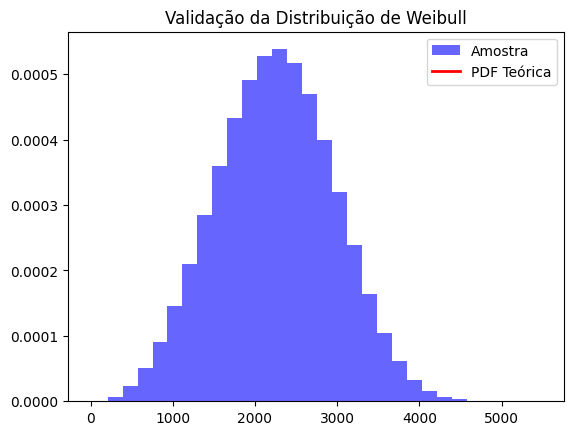

In [15]:
# Exemplo 5: Combina√ß√£o de par√¢metros - tamanho personalizado, salvar imagem e nome de arquivo personalizado
cria_data_set(k=3.5, lambda_=2500, size=5_000_000, save_img=True, nome_arquivo="dados_weibull_brocas")